# Kütüphanelerin Dahil Edilmesi

In [1]:
import pandas as pnd
import numpy as nmp
from sklearn.model_selection import train_test_split ,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
from matplotlib import pyplot as plt

# Verisetinin Yüklenmesi

In [2]:
data = pnd.read_excel(r"E:\test\Car-Price-Prediction\pages\static\excel\Chevrolet.xlsx")

data #Excelden okunan verinin çıktısı.

,Unnamed: 0,Fiyat,Yıl,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen,Seri_Aveo,Seri_Cruze,...,Model_1.6 WTCC Edition,Model_1.6 WTCC Edition Plus,Model_2.0 D CDX,Model_2.0 D LT,Model_2.0 D LTZ,Yakıt_Benzin,Yakıt_Dizel,Yakıt_LPG & Benzin,Vites_Düz,Vites_Otomatik
0,3854,169000,2011,100,1398,79000,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
1,3855,133500,2011,100,1398,215000,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,3856,145000,2007,94,1399,129000,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,3857,139500,2006,94,1399,185000,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,3858,122500,2005,109,1598,206000,1,2,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,5300,195000,2012,163,1998,190000,2,0,0,1,...,0,0,0,0,1,0,1,0,0,1
1447,5301,192000,2011,124,1598,118000,2,2,0,1,...,0,0,0,0,0,0,0,1,0,1
1448,5302,210000,2010,113,1598,114000,2,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1449,5303,225000,2012,124,1598,170000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


# Veri Analizi

In [3]:
data.corr()["Fiyat"]

Unnamed: 0    -0.061255
Fiyat          1.000000
Yıl            0.265570
Motor Gücü     0.706387
Motor Hacmi    0.439958
Kilometre     -0.221555
Name: Fiyat, dtype: float64

Text(0, 0.5, 'Araç Sayısı')

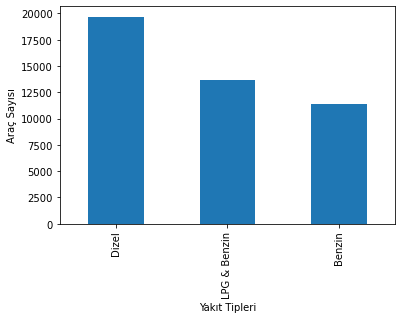

In [4]:
data["Yakıt Tipi"].value_counts().plot.bar()
plt.xlabel('Yakıt Tipleri')
plt.ylabel('Araç Sayısı') #Veri analizi için araç sayısı ile yakıt tiplerinin grafiği

In [5]:
data["Yakıt Tipi"].value_counts()

KeyError: 'Yakıt Tipi'

In [6]:
data["Vites Tipi"].value_counts()

Düz              24896
Otomatik         10526
Yarı Otomatik     9307
Name: Vites Tipi, dtype: int64

In [7]:
data["Marka"].value_counts()

Audi               2484
BMW                2478
Citroen            2476
Honda              2476
Volkswagen         2467
Hyundai            2467
Fiat               2466
Peugeot            2463
Opel               2462
Renault            2462
Skoda              2461
Ford               2452
Mercedes - Benz    2449
Toyota             2444
Seat               2277
Dacia              1638
Chevrolet          1589
Kia                1199
Volvo               785
Nissan              747
Mazda               412
Mitsubishi          263
Alfa Romeo          252
MINI                224
Suzuki              191
Porsche             172
Subaru               79
Rover                77
Chrysler             72
Ferrari              53
Proton               50
Chery                49
Aston Martin         31
Saab                 22
Smart                17
Rolls-Royce           7
Cadillac              6
Pontiac               4
MG                    2
Plymouth              2
Anadol                1
Oldsmobile      

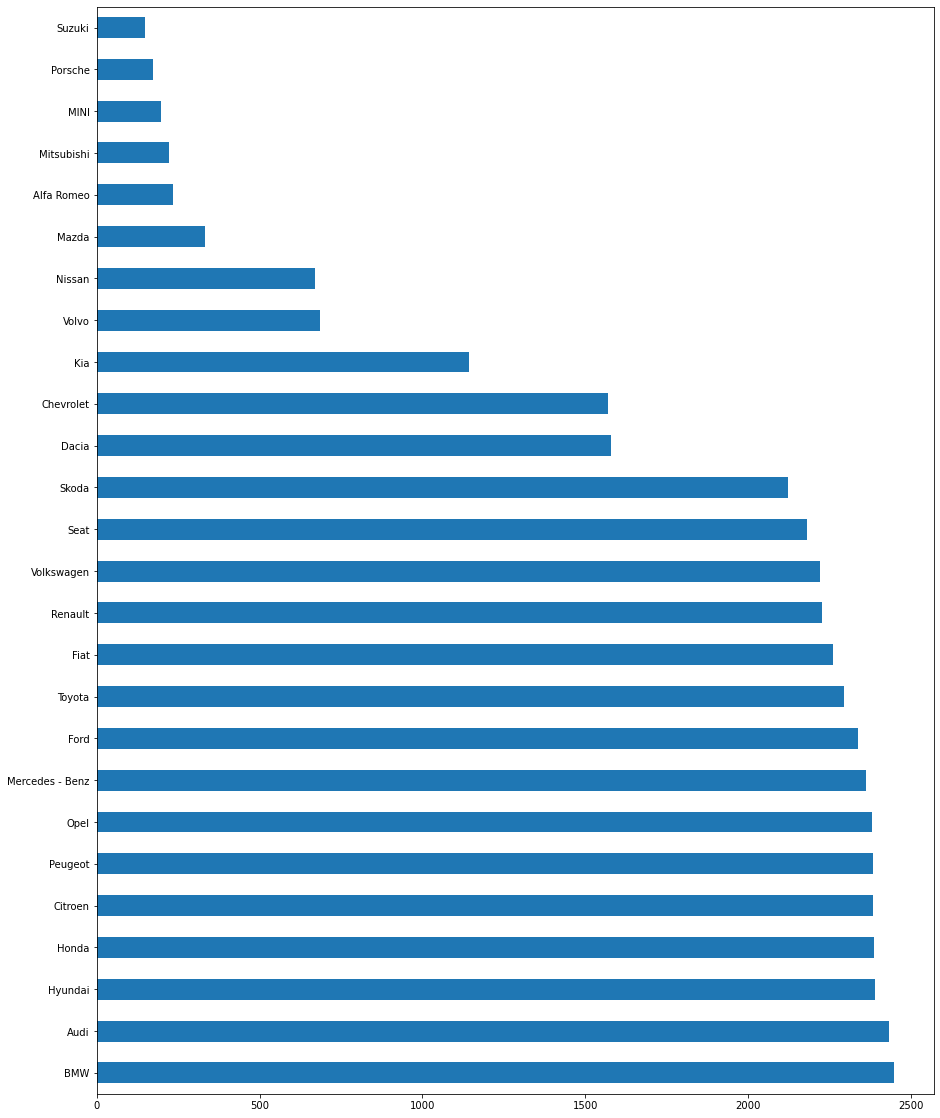

In [61]:
data.Marka.value_counts().plot.barh(figsize=(15,20))

In [9]:
data.Marka.value_counts() #Tüm araçların marka bazlı sayılarının gösterimi.

Audi               2484
BMW                2478
Citroen            2476
Honda              2476
Volkswagen         2467
Hyundai            2467
Fiat               2466
Peugeot            2463
Opel               2462
Renault            2462
Skoda              2461
Ford               2452
Mercedes - Benz    2449
Toyota             2444
Seat               2277
Dacia              1638
Chevrolet          1589
Kia                1199
Volvo               785
Nissan              747
Mazda               412
Mitsubishi          263
Alfa Romeo          252
MINI                224
Suzuki              191
Porsche             172
Subaru               79
Rover                77
Chrysler             72
Ferrari              53
Proton               50
Chery                49
Aston Martin         31
Saab                 22
Smart                17
Rolls-Royce           7
Cadillac              6
Pontiac               4
MG                    2
Plymouth              2
Anadol                1
Oldsmobile      

# Aykırı Değer Analizi

In [10]:
marka_columns = data["Marka"].unique()
marka_columns

array(['Alfa Romeo', 'Anadol', 'Aston Martin', 'Audi', 'BMW', 'Cadillac',
       'Chery', 'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Ferrari',
       'Fiat', 'Ford', 'Honda', 'Hyundai', 'Kia', 'Mazda',
       'Mercedes - Benz', 'MG', 'MINI', 'Mitsubishi', 'Nissan',
       'Oldsmobile', 'Opel', 'Peugeot', 'Plymouth', 'Pontiac', 'Porsche',
       'Proton', 'Renault', 'Rolls-Royce', 'Rover', 'Saab', 'Seat',
       'Skoda', 'Smart', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [11]:
#Yazılan fonksiyonda farklı markalara ait aynı özellikleri birbirine denk döndürdüğü için marka sütunu için ayrı fonksiyon yazılmıştır.
def data_manipulation(column:list,group:str,kriter:int,marka:str): 
    for col in column:
        arac_sayisi = len(data[data["Marka"] == marka].groupby(group).get_group(col))
        index = data.groupby(group).get_group(col).index
        if arac_sayisi < kriter:
            data.drop(index,axis=0,inplace=True)

In [12]:
def data_marka(column:list,group:str,kriter:int):
    for col in column:
        arac_sayisi = len(data.groupby(group).get_group(col))
        index = data.groupby(group).get_group(col).index
        if arac_sayisi < kriter:
            data.drop(index,axis=0,inplace=True)

In [13]:
data_marka(column=marka_columns,group="Marka",kriter=102)

In [14]:
data.sort_values("Fiyat",ascending=True).head(100)

,Unnamed: 0,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen
31921,31921,1000,Renault,R 12,SW,1977,LPG & Benzin,Düz,60,1300,56000,Belirtilmemiş
34630,34630,1000,Seat,Cordoba,1.6 Signo,2000,LPG & Benzin,Düz,100,1595,236000,Belirtilmemiş
39797,39797,1000,Toyota,Corolla,1.6 Sol,2003,LPG & Benzin,Düz,110,1598,225000,1 değişen
16716,16716,6200,Honda,Civic,1.5 EX,1994,LPG & Benzin,Düz,90,1493,300000,Belirtilmemiş
38588,38588,22000,Skoda,Favorit,1.3 GLX,1993,LPG & Benzin,Düz,57,1289,194000,Belirtilmemiş
...,...,...,...,...,...,...,...,...,...,...,...,...
38689,38689,34000,Skoda,Forman,LX,1993,LPG & Benzin,Düz,0,0,264000,Belirtilmemiş
38082,38082,34000,Skoda,Favorit,1.3 Silver Line,1994,LPG & Benzin,Düz,58,1289,220000,Belirtilmemiş
37274,37274,34000,Skoda,Favorit,1.3 GLX,1994,LPG & Benzin,Düz,57,1289,278000,Belirtilmemiş
38398,38398,34000,Skoda,Favorit,135 LS,1992,LPG & Benzin,Düz,58,1289,184000,Belirtilmemiş


In [15]:
data.drop(data.sort_values("Fiyat",ascending=True).head(1000).index,axis=0,inplace=True)

## Verilerin düzenlenmesi

In [99]:
data[data["Marka"] == "Alfa Romeo"].Seri.value_counts().plot.barh() #Markaların serilere göre araç sayılarının gösterimi

Octavia     911
SuperB      700
Fabia       382
Rapid       164
Felicia      98
Favorit      88
Scala        44
Forman       42
Roomster     30
Citigo        2
Name: Seri, dtype: int64

In [ ]:
data_manipulation(column=data[data["Marka"] == "Alfa Romeo"].Seri.unique(),group="Seri",kriter=10,marka="Alfa Romeo")

In [ ]:
data[data["Marka"] == "Audi"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "Audi"].Seri.unique(),group="Seri",kriter=50,marka="Audi")

In [ ]:
data[data["Marka"] == "BMW"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "BMW"].Seri.unique(),group="Seri",kriter=50,marka="BMW")

In [ ]:
data[data["Marka"] == "Chevrolet"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "Chevrolet"].Seri.unique(),group="Seri",kriter=50,marka="Chevrolet")

In [ ]:
data[data["Marka"] == "Citroen"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "Citroen"].Seri.unique(),group="Seri",kriter=50,marka="Citroen")

In [ ]:
data[data["Seri"] == "Xsara"].Seri.value_counts().plot.barh()

In [ ]:
data[data["Marka"] == "Dacia"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "Dacia"].Seri.unique(),group="Seri",kriter=50,marka="Dacia")

In [ ]:
data[data["Marka"] == "Fiat"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "Fiat"].Seri.unique(),group="Seri",kriter=85,marka="Fiat")

In [ ]:
data[data["Marka"] == "Ford"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "Ford"].Seri.unique(),group="Seri",kriter=50,marka="Ford")

In [ ]:
data[data["Marka"] == "Honda"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "Honda"].Seri.unique(),group="Seri",kriter=30,marka="Honda")

In [ ]:
data[data["Marka"] == "Hyundai"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "Hyundai"].Seri.unique(),group="Seri",kriter=100,marka="Hyundai")

In [ ]:
data[data["Marka"] == "Kia"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "Kia"].Seri.unique(),group="Seri",kriter=50,marka="Kia")

In [ ]:
data[data["Marka"] == "Mazda"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "Mazda"].Seri.unique(),group="Seri",kriter=30,marka="Mazda")

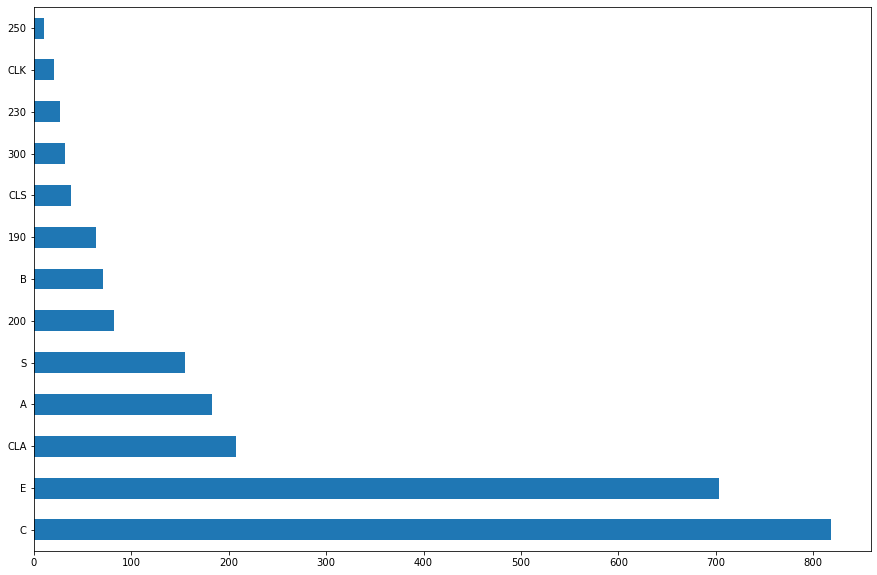

In [81]:
data[data["Marka"] == "Mercedes - Benz"].Seri.value_counts().plot.barh(figsize=(15,10))

In [80]:
data_manipulation(column=data[data["Marka"] == "Mercedes - Benz"].Seri.unique(),group="Seri",kriter=10,marka="Mercedes - Benz")

In [ ]:
data[data["Marka"] == "Opel"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "Opel"].Seri.unique(),group="Seri",kriter=100,marka="Opel")

In [ ]:
data[data["Marka"] == "Peugeot"].Seri.value_counts().plot.barh()

In [ ]:
data_manipulation(column=data[data["Marka"] == "Peugeot"].Seri.unique(),group="Seri",kriter=50,marka="Peugeot")

In [93]:
data[data["Marka"] == "Porsche"].Seri.value_counts().plot.barh()

Panamera    92
911         50
Cayman      18
Boxster      8
718          4
Name: Seri, dtype: int64

In [ ]:
data_manipulation(column=data[data["Marka"] == "Porsche"].Seri.unique(),group="Seri",kriter=10,marka="Porsche")

In [97]:
data[data["Marka"] == "Renault"].Seri.value_counts().plot.barh()

Clio        721
Megane      610
Fluence     347
Symbol      322
R 9         131
R 12         88
R 19         74
Laguna       68
Scenic       28
Latitude     19
R 11         12
R 21         10
Name: Seri, dtype: int64

In [95]:
data_manipulation(column=data[data["Marka"] == "Renault"].Seri.unique(),group="Seri",kriter=10,marka="Renault")

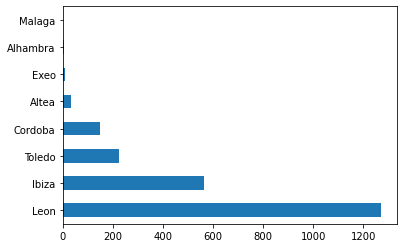

In [17]:
data[data["Marka"] == "Seat"].Seri.value_counts().plot.barh()

In [18]:
data_manipulation(column=data[data["Marka"] == "Seat"].Seri.unique(),group="Seri",kriter=150,marka="Seat")

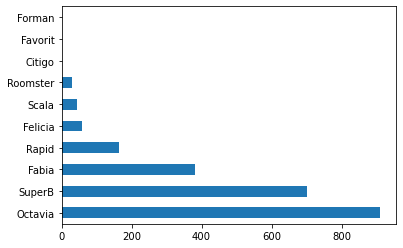

In [19]:
data[data["Marka"] == "Skoda"].Seri.value_counts().plot.barh()

In [20]:
data_manipulation(column=data[data["Marka"] == "Skoda"].Seri.unique(),group="Seri",kriter=150,marka="Skoda")

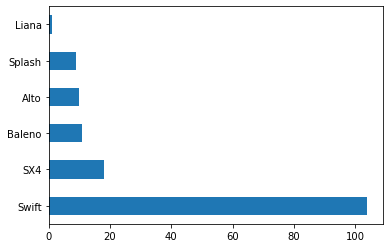

In [21]:
data[data["Marka"] == "Suzuki"].Seri.value_counts().plot.barh()

In [22]:
data_manipulation(column=data[data["Marka"] == "Suzuki"].Seri.unique(),group="Seri",kriter=5,marka="Suzuki")

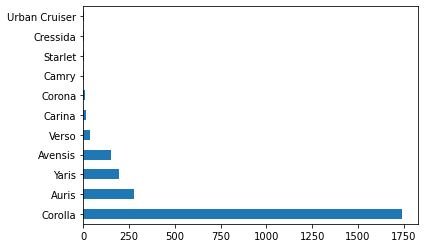

In [23]:
data[data["Marka"] == "Toyota"].Seri.value_counts().plot.barh()

In [24]:
data_manipulation(column=data[data["Marka"] == "Toyota"].Seri.unique(),group="Seri",kriter=50,marka="Toyota")

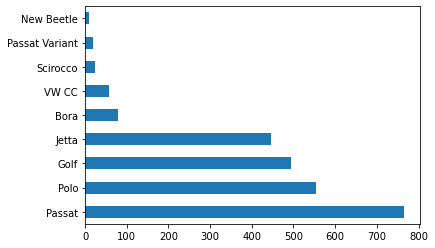

In [102]:
data[data["Marka"] == "Volkswagen"].Seri.value_counts().plot.barh()

In [101]:
data_manipulation(column=data[data["Marka"] == "Volkswagen"].Seri.unique(),group="Seri",kriter=10,marka="Volkswagen")

In [107]:
data[data["Marka"] == "Volvo"].Seri.value_counts().plot.barh()

S60                  308
S40                  211
V40                   66
S80                   62
S90                   37
V40 Cross Country     22
Name: Seri, dtype: int64

In [105]:
data_manipulation(column=data[data["Marka"] == "Volvo"].Seri.unique(),group="Seri",kriter=20,marka="Volvo")

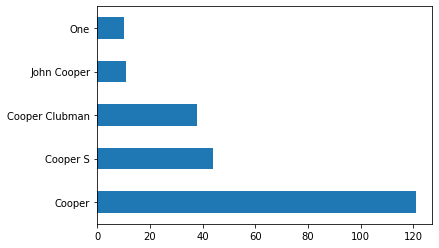

In [29]:
data[data["Marka"] == "MINI"].Seri.value_counts().plot.barh()

In [30]:
data_manipulation(column=data[data["Marka"] == "MINI"].Seri.unique(),group="Seri",kriter=20,marka="MINI")

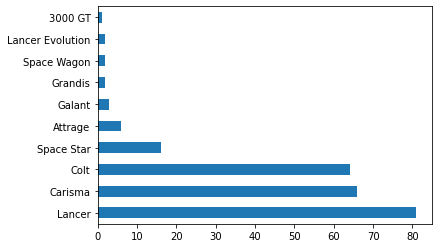

In [31]:
data[data["Marka"] == "Mitsubishi"].Seri.value_counts().plot.barh()

In [32]:
data_manipulation(column=data[data["Marka"] == "Mitsubishi"].Seri.unique(),group="Seri",kriter=10,marka="Mitsubishi")

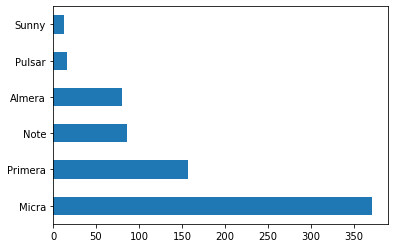

In [88]:
data[data["Marka"] == "Nissan"].Seri.value_counts().plot.barh()

In [87]:
data_manipulation(column=data[data["Marka"] == "Nissan"].Seri.unique(),group="Seri",kriter=10,marka="Nissan")

# Boya-Değişen Sütunu İşlemleri

In [36]:
data.loc[data["Boya-değişen"] == "Tamamı boyalı","Boya-değişen"] = "Tamamı boya"
data["Boya-değişen"].unique()

array(['12 boyalı', 'Belirtilmemiş', 'Tamamı boya', '6 boyalı',
       '1 değişen, 12 boyalı', '9 boyalı', '1 değişen, 2 boyalı',
       '2 değişen, 10 boyalı', '6 değişen', '2 değişen, 3 boyalı',
       '3 değişen, 1 boyalı', '2 değişen, 1 boyalı',
       '4 değişen, 5 boyalı', '5 boyalı', '2 değişen', 'Tamamı orjinal',
       '2 değişen, 4 boyalı', '1 boyalı', '1 değişen, 3 boyalı',
       '3 boyalı', '1 değişen, 11 boyalı', '1 değişen, 10 boyalı',
       '2 boyalı', '1 değişen', '1 değişen, 5 boyalı',
       '1 değişen, 6 boyalı', '2 değişen, 7 boyalı',
       '2 değişen, 11 boyalı', '4 boyalı', '1 değişen, 7 boyalı',
       '2 değişen, 8 boyalı', '8 boyalı', '3 değişen, 6 boyalı',
       '1 değişen, 9 boyalı', '4 değişen, 9 boyalı',
       '1 değişen, 4 boyalı', '2 değişen, 2 boyalı',
       '1 değişen, 8 boyalı', '4 değişen, 8 boyalı', '7 boyalı',
       '3 değişen, 10 boyalı', '1 değişen, 1 boyalı',
       '4 değişen, 1 boyalı', '10 boyalı', '3 değişen',
       '2 değişen, 6 boya

In [37]:
data[["Boya","Değişen"]] = "-"

KeyError: "None of [Index(['Boya', 'Değişen'], dtype='object')] are in the [columns]"

In [39]:
data.loc[data["Boya-değişen"].str.contains(","),"Boya-değişen"] = data["Boya-değişen"].str.replace(" değişen","-").str.replace(" boyalı","")

In [40]:
data.loc[data["Boya-değişen"].str.contains(","),"Boya-değişen"] = data["Boya-değişen"].str.replace(", ","")

In [42]:
data.loc[data["Boya-değişen"] == "Tamamı boya",["Boya","Değişen"]] = [13,0]
data.loc[data["Boya-değişen"] == "Tamamı değişmiş",["Boya","Değişen"]] = [0,13]

KeyError: "None of [Index(['Boya', 'Değişen'], dtype='object')] are in the [columns]"

In [43]:
data.loc[data["Boya-değişen"].str.contains("-"),"Boya"] = data["Boya-değişen"].str.split("-").str.get(0)
data.loc[data["Boya-değişen"].str.contains("-"),"Değişen"] = data["Boya-değişen"].str.split("-").str.get(1)

In [44]:
data.loc[data["Boya-değişen"].str.contains("boyalı"), "Boya"] = data["Boya-değişen"].str.replace(" boyalı","")
data.loc[data["Boya-değişen"].str.contains("boyalı"), "Değişen"] = 0

In [45]:
data.loc[data["Boya-değişen"].str.contains("değişen"), "Değişen"] = data["Boya-değişen"].str.replace(" değişen","")
data.loc[data["Boya-değişen"].str.contains("değişen"), "Boya"] = 0

In [46]:
data.loc[data["Boya-değişen"] == "Belirtilmemiş",["Boya","Değişen"]] = [0,0]

In [47]:
data.loc[data["Boya-değişen"] == "Tamamı orjinal",["Boya","Değişen"]] = [0,0]

In [48]:
def convert_value_Type(obj):
    return int(obj)

In [49]:
data[data["Boya"] == "-"]

,Unnamed: 0,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen,Boya,Değişen


In [50]:
data["Boya"] = data["Boya"].apply(convert_value_Type)
data["Değişen"] = data["Değişen"].apply(convert_value_Type)

ValueError: cannot convert float NaN to integer

In [51]:
data.drop("Boya-değişen",axis=1,inplace=True)

In [58]:
data.to_excel('Arabalar.xlsx')

KeyboardInterrupt: 

In [ ]:
pnd.DataFrame()

# Dataseti Markalara Göre Ayırma

In [164]:
markalar = data["Marka"].unique()

In [165]:
def markalara_Ayir():
    for marka in markalar:
        dset = data.groupby("Marka").get_group(marka)["Seri"].unique()
        dset = pnd.DataFrame(dset)
        dset.to_excel(f'{marka}_Serileri.xlsx')

In [166]:
markalara_Ayir()

# Marka Bazlı One-hot Encoding

In [167]:
def encoding(markalar:list):
    for marka in markalar:
        marka = pnd.read_excel(f"{marka}.xlsx")
        marka.drop("Unnamed: 0",axis=1,inplace=True)
    

In [169]:
marka = "BMW"
ds = pnd.read_excel(f"{marka}.xlsx")
ds2 = ds.drop(["Unnamed: 0","Marka"],axis=1,inplace=True)
ds2 = pnd.get_dummies(data=ds,columns=["Seri","Model"],prefix=["Seri","Model"])
ds2

FileNotFoundError: [Errno 2] No such file or directory: 'BMW.xlsx'

In [110]:
ds2.columns[10]

'Vites_Düz'

### Tahmin Verisi Oluşturma

In [33]:
def get_column_names(col_name:str): 
    columns = data.columns
    liste = []
    for col in columns:
        if col_name in col:
            liste.append(col)
    return liste

In [36]:
def converting(column:str,col_name:str):
    liste = get_column_names(column)
    predict_list = list(nmp.zeros(len(liste),dtype=int))
    for item in liste:
      index=0
      if item.endswith(col_name):
        itemindex = liste.index(item)
        predict_list[index] = 1
        index+=1
    return predict_list

In [61]:
tahmin_verisi = [2015,251,2501,40000,0,0]

In [62]:
tahmin_verisi.extend(converting("Yakıt","Dizel"))

In [63]:
tahmin_verisi

[2015, 251, 2501, 40000, 0, 0, 1, 0, 0]

In [64]:
tahmin_verisi.extend(converting("Vites","Otomatik"))

In [65]:
tahmin_verisi

[2015, 251, 2501, 40000, 0, 0, 1, 0, 0, 1, 0, 0]

In [66]:
tahmin_verisi.extend(converting("Seri","A8"))

In [67]:
tahmin_verisi

[2015, 251, 2501, 40000, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]

In [68]:
tahmin_verisi.extend(converting("Model","4.2 Quattro"))

In [69]:
len(tahmin_verisi)

182

# Yakıt Tipi One-Hot

In [70]:
seri_list = get_column_names("Yakıt")

In [71]:
seri_list

['Yakıt_Benzin', 'Yakıt_Dizel', 'Yakıt_LPG & Benzin']

In [37]:
ohe_Seri = 
ohe_Seri

[0, 0, 0, 0]

In [299]:
ds2.Fiyat.sort_values(ascending=False).head(1).index

Int64Index([33], dtype='int64')

String 

In [44]:
ohe_Seri

[1, 0, 1, 0]

In [301]:
ds2.to_excel("BMW_OneHot.xlsx")

In [304]:
ds2.min()

Fiyat              41999
Yıl                 1984
Motor Gücü            90
Motor Hacmi         1200
Kilometre              0
                   ...  
Model_740i Long        0
Model_745i             0
Model_745i Long        0
Model_750i Long        0
Model_760i Long        0
Length: 230, dtype: int64

In [21]:
len(ds2["Motor Hacmi"].unique())

31

# Train-Test Split

In [9]:
x = data.drop("Fiyat",axis=1)
y = data["Fiyat"]

In [10]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)

# Linear Regression

In [296]:
model= LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [297]:
mean_absolute_error(pred,y_test)

3416964623.82456

In [18]:
model.predict([[2015,1,1598,175000,3,5,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([196007.51039563])

# Cross Validation

In [234]:
yeni = ds2.loc[y_test.head(50).index][["Fiyat","Yıl","Kilometre","Motor Gücü","Motor Hacmi","Boya","Değişen"]]
yeni["Tahmin"] = pred[0:50]
yeni["Fark"] = (yeni.Tahmin - yeni.Fiyat).abs()
yeni

,Fiyat,Yıl,Kilometre,Motor Gücü,Motor Hacmi,Boya,Değişen,Tahmin,Fark
1222,150000,2008,275000,102,1595,6,0,170443.220030,20443.220030
1145,347000,2013,200000,177,1968,0,0,411616.380796,64616.380796
787,321900,2017,134000,116,1598,0,0,346124.968534,24224.968534
361,243500,2011,151000,120,1798,3,0,203433.387502,40066.612498
86,298500,2013,229000,177,1968,1,2,296407.275186,2092.724814
323,490000,2020,24098,150,1498,0,0,491721.142751,1721.142751
110,175000,2006,255000,233,2967,0,0,319077.196277,144077.196277
1137,242000,2015,149000,110,1598,1,2,275946.594327,33946.594327
213,212500,2012,178000,105,1598,6,0,211096.562593,1403.437407
42,155000,2007,101000,102,1595,0,0,176785.242498,21785.242498


In [29]:
bst = xgb.XGBRegressor()

In [24]:
data

,Fiyat,Yıl,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen,Yakıt_Benzin,Yakıt_Dizel,Yakıt_LPG & Benzin,...,Model_A6 Sedan 3.0 Quattro,Model_A6 Sedan 3.0 TDI Quattro,Model_A6 Sedan 3.2 FSI Quattro,Model_A6 Sedan 40 TDI Design,Model_A6 Sedan 40 TDI Quattro Design,Model_A6 Sedan 40 TDI Quattro Sport,Model_A6 Sedan 40 TDI Sport,Model_A6 Sedan 45 TFSI Quattro Design,Model_A6 Sedan 45 TFSI Quattro Sport,Model_A6 Sedan 50 TDI Quattro Design
0,315000,2013,105,1598,245000,5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,580000,2016,110,1598,38610,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,535000,2018,110,1598,88000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,155000,2003,150,1781,421000,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,365000,2011,126,1968,318000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,500000,2011,177,1998,201000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1869,279750,2005,163,1781,248000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1870,230000,2008,140,1968,286000,2,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1871,168000,2003,130,1984,264000,2,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
ds3 = data
ds3 = ds3.astype(str)
ds3['Kolonlar'] = ds3.apply(",".join,axis=1)
ds3 = pnd.DataFrame(data = ds3.Kolonlar)
ds3

,Kolonlar
0,"43944,335950,2013,115,1560,260800,0,0,0,1,0,0,..."
1,"43945,160000,2005,100,1596,249000,0,0,0,0,1,1,..."
2,"43947,113500,2004,200,1948,237000,1,0,0,0,1,0,..."
3,"43951,398000,2013,115,1560,162750,0,0,0,1,0,0,..."
4,"43952,110000,2000,122,1783,336000,0,0,1,0,0,0,..."
...,...
552,"44721,377500,2015,115,1560,152000,0,0,0,1,0,0,..."
553,"44722,97000,2002,109,1587,270000,0,0,0,0,1,1,0..."
554,"44724,308000,2011,163,1984,278000,1,1,0,1,0,0,..."
555,"44726,542000,2018,152,1498,39000,2,0,1,0,0,0,1..."


In [4]:
list(ds3.loc[1])

['43945,160000,2005,100,1596,249000,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0']

In [270]:
ds3.to_excel("Audi_Kolonlar.xlsx")

In [30]:
xgb_grid = {
            'colsample_bytree':[0.4,0.5,0.6,1], 
            'n_estimators':[100,200,300,700], 
            'max_depth':[2,3,4,5], 
            'learning_rate':[0.1,0.01,0.2,0.5]
           }

In [31]:
bst_cv = GridSearchCV(bst,
                     param_grid=xgb_grid,
                     cv = 4,
                     n_jobs = -1,
                     verbose = 2)

In [14]:
bst_cv.fit(x_train,y_train)
pred = bst_cv.predict(x_test)

NameError: name 'bst_cv' is not defined

In [33]:
bst_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 700}

In [18]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
import xgboost as xgb

In [8]:
xgb_tuned = xgb.XGBRegressor(colsample_bytree = 1,learning_rate = 0.2,max_depth = 2,n_estimators = 850)

In [9]:
xgb_tuned.fit(x_train,y_train)
pred = xgb_tuned.predict(x_test)

NameError: name 'x_train' is not defined

In [59]:
mean_absolute_error(y_test,pred)

52184.23128197286

In [281]:
ds.loc[[693,1001,408,800,290,1331,272]]

,Fiyat,Seri,Model,Yıl,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen,Yakıt_Benzin,Yakıt_Dizel,Yakıt_LPG & Benzin,Vites_Düz,Vites_Otomatik,Vites_Yarı Otomatik
693,89000,A4,A4 Sedan 1.6,2000,102,1595,445000,0,0,0,0,1,1,0,0
1001,143900,A3,A3 Sportback 1.4 TFSI Ambition,2008,125,1390,172500,0,2,1,0,0,1,0,0
408,599000,A4,A4 Sedan 2.0 TDI Quattro Design,2016,190,1968,112376,0,0,0,1,0,0,0,1
800,790000,A5,A5 Coupe 2.0 TDI,2018,177,1968,118500,4,0,0,1,0,0,1,0
290,345000,A4,A4 Sedan 2.0 TDI,2014,150,1968,178000,0,0,0,1,0,0,1,0
1331,725000,A5,A5 Coupe 2.0 TDI Design,2018,190,1968,122782,0,0,0,1,0,0,0,1
272,346750,A3,A3 Sedan 1.6 TDI Ambition,2015,110,1598,99000,0,0,0,1,0,0,0,1


In [6]:
xgb_tuned.predict(['1,423000,2017,170,1368,63000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0'].reshape(1,-1))   

NameError: name 'xgb_tuned' is not defined

In [275]:
model.predict([[2014,110,1598,175000,0,2,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 151 is different from 168)